# Titanic: Investigando o naufrágio através dos dados.

O desafio do Titanic ficou popularmente conhecido por conta do [Kaggle](https://https://www.kaggle.com/), e é considerado um dos passos iniciais na área de machine learning. 

Em 15 de abril de 1912, ao colidir com um *iceberg*, o Titanic naufragou, ocasionando a morte de 1502 pessoas - de um total de 2224. 

**Utilizando uma base de dados real, o objetivo desse desafio é mensurar a chance de sobrevivencia dos passageiros do Titanic, de acordo com suas características.**

# Checklist do relatório:



1.   Definição do Problema; 
2.   Obtenção de Dados;
3. Exploração de Dados;
4. Preparação dos Dados;
5. Construção do Modelo;
6. Avaliação.



# 1. Definição do Problema

O naufrágio do Titanic é um dos mais famosos da história, e ocorreu na sua viagem inaugural, em abril de 1912, quando era considerado "inaufragável". Com a ausência de botes salva-vidas para todos, houve a morte de 1.502 pessoas entre os 2.224 passageiros e tripulantes.

Apesar do fator sorte envolvido na sobrevivência, analisando os dados é possível perceber que determinados grupos de pessoas tinham mais chance de sobreviver que outros.

A descrição do desafio e o dataset estão disponíveis na página do Kaggle: [Titanic - Machine Learning from Disaster](https://https://www.kaggle.com/c/titanic)

# Objetivo

Construção de um modelo preditivo, que utilize os dados dos passageiros para responder quais grupos de pessoas têm mais probabilidade de sobrevier.


# Métrica de desempenho

O score é calculado baseado no número de previsões corretas do modelo, ou seja, considera a acurácia do modelo.



# 2. Obtenção dos Dados 

O Kaggle disponibilizou os dados em dois grupos: 

* Dataset de treino - ```train.csv```
  * Esse dataset informa se o passageiro sobreviveu ou não e deve ser usado para desenvolver o modelo de Machine Learning.
  * Possui diversas *features*, como classe, idade e gênero do passageiro.

* Dataset de Teste - ```test.csv```
  * Esse conjunto de dados não informa se o passageiro sobreviveu ou não e deve ser usado como dados que nunca foram vistos pelo modelo.

O Kaggle disponibiliza um modelo de como as previsões devem ser submetidas à plataforma (```gender_submission```)



In [1]:
#pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#visualizar todas as colunas
pd.options.display.max_columns = None

In [2]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [3]:
#verificando as dimensões do DataFrame

print(f'BASE TREINO\nVariáveis:\t{train.shape[1]}\nEntradas:\t{train.shape[0]}\n')
print(f'BASE TESTE\nVariáveis:\t{test.shape[1]}\nEntradas:\t{test.shape[0]}')

BASE TREINO
Variáveis:	12
Entradas:	891

BASE TESTE
Variáveis:	11
Entradas:	418


# 3. Exploração de Dados

O estudo de cada variável é realizado, com atenção aos seus nomes, tipos, porcentagem de valores ausentes, outliers e tipos de distribuição. 

O modelo utilizado é classificado como de Aprendizado Supervisionado (*Supervised Learning*) e a variável alvo (*target*) é a variável ```Survived```.


# Dicionário de Dados

* **PassengerId:** Número de identificação do passageiro
* **Survived:** Informa se o passageiro sobreviveu ao desastre
    * 0 = Não
    * 1 = Sim
* **Pclass:** Classe do bilhete
    * 1 = 1ª Classe
    * 2 = 2ª Classe
    * 3 = 3ª Classe
* **Name:** Nome do passageiro
* **Sex:** Sexo do passageiro
* **Age:** Idade do passageiro
* **SibSp:** Quantidade de cônjuges e irmãos a bordo
* **Parch:** Quantidade de pais e filhos a bordo
* **Ticket:** Número da passagem
* **Fare:** Preço da Passagem
* **Cabin:** Número da cabine do passageiro
* **Embarked:** Porto no qual o passageiro embarcou
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton


## Tipos das Variáveis

* Variáveis Numéricas
    * Discretas
        * Pclass
        * SibSp
        * Parch
    * Contínuas
        * Age
        * Fare
    * Alvo
        * Survived
    * Chave Primária
        * PassengerId
* Variáveis Categóricas
    * Name
    * Sex
    * Ticket
    * Cabin
    * Embarked

In [4]:
#identificando os tipos de cada variável

display(train.dtypes)

#5 primeiras entradas do conjunto de treino

display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Porcentagem de valores ausentes

A variável ```Cabin``` é a que possui mais valores ausentes, 77%. A coluna ```Age``` vem em seguida, com mais de 19%, e a coluna ```Embarked``` possui 2% de valores ausentes.

In [5]:
#porcetagem de valores ausentes

(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

##Distribuição estatística dos dados

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


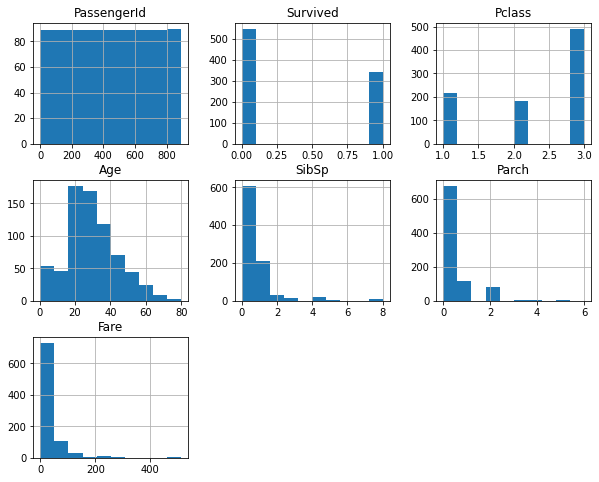

In [7]:
#plotar histograma das variáveis numéricas

train.hist(figsize=(10,8));
plt.savefig('hist.png', dpi=300)

## Grupos de pessoas com mais chances de sobreviver

In [8]:
#probabilidade de sobrevivência pelo sexo

train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


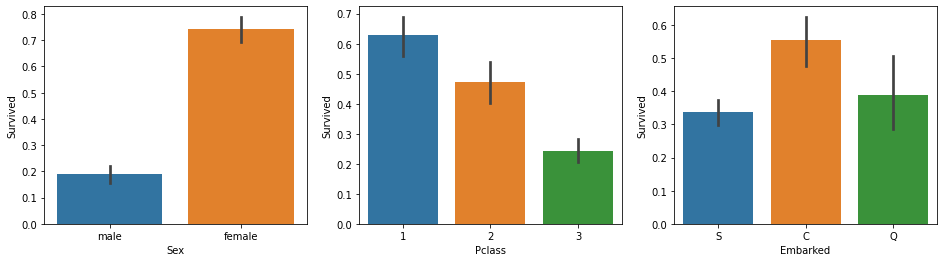

In [9]:
#plotar os gráficos para Survived vs. Sex, Pclass e Embarked

fig, (axis1, axis2, axis3) = plt.subplots (1,3, figsize=(16,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);
plt.savefig('barplot.png', dpi=300)

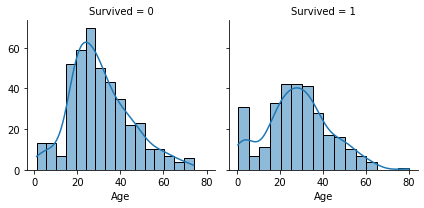

In [10]:
#influência da idade na probabilidade de sobrevivência

age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.histplot, 'Age', kde=True);
plt.savefig('histplot.png', dpi=300)

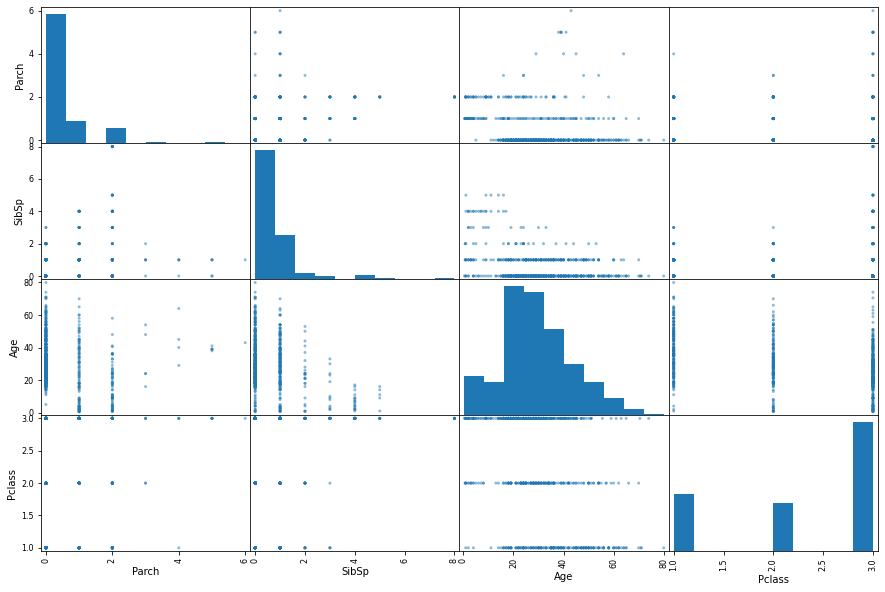

In [11]:
#plotar uma scatter matrix

columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15,10));
plt.savefig('scattermatrix.png', dpi=300)

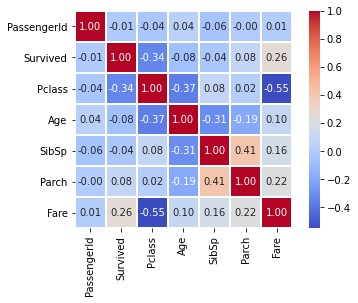

In [12]:
#plotar o heatmap para variáveis numéricas
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);
plt.savefig('Heatmap.png', dpi=300)

O método ```df.describe()``` pode ser utilizado para analisar a estatística descritiva de variáveis categóricas, passando o argumento ```include=['O']```.

In [13]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


Observando esses dados, temos que:

* Os valores ```Name``` são únicos para cada pessoa;
* Não há valores faltantes em ```Name``` e ```Sex```;
* A frequência do sexo masculino é de 65% (577 de 891 pessoas);
* O porto pelo qual embarcaram mais passageiros foi o de S = Southampton.

# 4 Preparação dos Dados

Até agora, o que foi realizado se trata de analise exploratória, visualização de gráficos e correlação entre variáveis, etapas fundamentais no processo. 

Juntando os *datasets* de treino e teste

Nessa análise, os datasets de treino e teste serão juntados e, somente no final, serão separados, para que sigam a mesma estrutura. 

In [14]:
#salvar os índices dos datasets para recuperação

train_idx = train.shape[0]
test_idx = test.shape[0]

#salvar PassengerId para submissão ao Kaggle

passengerId = test['PassengerId']

#extrair coluna 'Survived' e excluir ela no dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

#concatenar treino e test em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print(f"df_merged.shape: ({df_merged.shape[0]} x {df_merged.shape[1]})")


df_merged.shape: (1309 x 11)


##Seleção de *features*

São desconsideradas as variáveis ```'PassengerId'```, ```'Name'```, ```'Ticket'```, e ```'Cabin'```, pois aparentemente não são relevantes para o modelo.

As variáveis que permanecem e serão tratadas para o modelo são ```'Pclass'```, ```'Sex'```, ```'Age'```, ```'SibSp'```, ```'Parch'```, ```'Fare'```, e ```'Embarked'```.

In [15]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

## Valores ausentes

Analisados os valores que faltam em cada coluna, é verificado qual aborgem cabe a situação. Existem duas mais populares, que são preencher os valores arbitrariamente - com a média, mediana ou moda - ou excluir a linha inteira. Há também a possibilidade de aplicação de um modelo de *machine learning* para preencher os dados ausentes. 

Cabe ao responsável verificar o que é melhor para cada análise, mas, na maioria das vezes, não é recomendável excluir uma linha inteira por conta de um valor ausente, e sim preencher o campo. 

In [16]:
#verificar os dados ausentes

df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Os valores ausentes das variáveis ```Age```e ```Fare``` serão substituídos pelo valor da mediana, e a ```Embarked``` pelo valor da moda.

In [17]:
#age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

#fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

#embarked
embarked_top = df_merged['Embarked'].value_counts().index[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

##Preparação das variáveis para o modelo

É necessário transformar variáveis categóricas em variáveis numéricas, por conta do modelo matemático. Então, a variável ```Sex``` é convertida para ```male```:0, e ```female```:1. Na variável ```Embarked``` é aplicado o conceito de variáveis dummies, onde uma nova coluna é criada para cada novo valor da variável, e assumem apenas os valores 0 e 1.


In [18]:
#converter Sex em 0 e 1

df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})


#dummie variables para Embarked
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


##Recuperação dos datasets de treino e teste

O dataset está preparado para a aplicação do modelo e é o momento de ser dividido em ```train```e ```test```, como era no início. 

In [19]:
#dividir df_merged em train e test

train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

#5 Construção do Modelo e Avaliação

Será construído um modelo básicos d *Machine Learning*, o Modelo de Regressão Logística. 

In [20]:
#importar biblioteca do modelo de Machine Learning

from sklearn.linear_model import LogisticRegression

#criar o modelo de Regressão Logística

lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

#verificar a acurácia do modelo
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print(f"Acurácia do Modelo de Regressão Logística: {(acc_logReg)}")

Acurácia do Modelo de Regressão Logística: 80.13


Utilizando os dados de treino, o modelo de Regressão Logística criado apresentou acurácia acima de 80%. Agora, o modelo será aplicado em cima dos dados de teste.

In [21]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
        "PassengerId": passengerId,
        "Survived": y_pred_lr
    })

#gerar arquivo csv
submission.to_csv('./submission_lr.csv', index=False)

No Kaggle, o modelo aplicado conseguiu um *score* de 76%

<img src='https://raw.githubusercontent.com/jullymaellylima/data_science/master/kaggle%20titanic.jpg' width="80%">

É normal que haja um desempenho inferior quando usamos os dados de teste, pois o modelo foi treinado com base nos dados de treino, e tem um *fit* melhor com esses dados.
